## Introduction:
In the modern eCommerce landscape, accurate product categorization is essential to enhance customer experiences, streamline product discoverability, and drive business growth.

However, managing and categorizing thousands of products across diverse categories presents significant challenges, including ambiguities in product descriptions, unconventional naming conventions, and multilingual data.

This project aims to develop a robust machine learning and deep learning-based text classification model to categorize eCommerce products accurately.

By leveraging product descriptions, we will transform raw text into meaningful features and build predictive models capable of handling the intricacies of the dataset.

The solution will enable seamless integration into eCommerce platforms, ensuring scalability, efficiency, and enhanced customer satisfaction.

## Importing Necessary Libraries

In [1]:
#importing the libraries for matrix and dataframe handling, plotting, etc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Input, Dropout, Input, Flatten, Conv1D, MaxPooling1D, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam


#miscellaneous libraries used
import re
import itertools
from collections import Counter
from sys import maxsize
import math
import warnings
warnings.filterwarnings("ignore")

#importing the NLP and Data Visualisation related libraries
import string
from string import ascii_letters, punctuation, digits
import nltk
nltk.download('all', quiet=True)
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# for spliting data set and metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

#Handling imbalance data
from imblearn.over_sampling import RandomOverSampler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

## Loading the Data

The Flipkart e-commerce product dataset that was given in a Google Sheet was first downloaded as a csv file. This dataset is the one to be visualised and preprocessed and is read using the Pandas library.

In [2]:
# Loading the data using pandas
data = pd.read_csv("/content/drive/MyDrive/Upgrad_bootcamp/UpGrad_Hackathon/train_product_data.csv")
data.head() # Viewing the glimpse of the data

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
2,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
3,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,"Key Features of dilli bazaaar Bellies, Corpora...",No rating available,No rating available,dilli bazaaar,"{""product_specification""=>[{""key""=>""Occasion"",..."


## Exploratory Data Analysis
### Understanding the Data

Before performing any processing on the available data, exploratory data analysis is recommended. This process includes visualization of the data for better understanding, identifying the outliers, and skewed predictors.

In [3]:
# Shape of the dataframe
data.shape

(14999, 15)

The Ecommerce Product Categorization dataset contains 15 columns and 14999 rows of data.

In [4]:
# Info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  14999 non-null  object 
 1   crawl_timestamp          14999 non-null  object 
 2   product_url              14999 non-null  object 
 3   product_name             14999 non-null  object 
 4   product_category_tree    14999 non-null  object 
 5   pid                      14999 non-null  object 
 6   retail_price             14942 non-null  float64
 7   discounted_price         14942 non-null  float64
 8   image                    14996 non-null  object 
 9   is_FK_Advantage_product  14999 non-null  bool   
 10  description              14998 non-null  object 
 11  product_rating           14999 non-null  object 
 12  overall_rating           14999 non-null  object 
 13  brand                    10289 non-null  object 
 14  product_specifications

In [5]:
# Summary Statistics of the dataset
data.describe()

,retail_price,discounted_price
count,14942.000000,14942.000000
mean,3128.424040,2087.732298
std,9154.463342,7712.247869
min,35.000000,35.000000
25%,699.000000,349.000000
50%,1000.000000,499.000000
75%,1989.750000,999.000000
max,571230.000000,571230.000000


### Considering Description of the Dataset
The Ecommerce Product Categorization data set has 15 attributes; out of these columns, we only extracted the following elements for further analysis:
*   description
*   product_category_tree

The remaining columns are not considered for building the text classification model as they makes the data complicated and doesn't have much information of the data. So, only the description column is considered useful for predicting the product category.

In [6]:
data = data[['description','product_category_tree']]
data.head() # Checking the first 5 rows of the dataset

,description,product_category_tree
0,Key Features of Alisha Solid Women's Cycling S...,Clothing
1,Key Features of AW Bellies Sandals Wedges Heel...,Footwear
2,Key Features of Alisha Solid Women's Cycling S...,Clothing
3,Key Features of Alisha Solid Women's Cycling S...,Clothing
4,"Key Features of dilli bazaaar Bellies, Corpora...",Footwear


In [7]:
# Checking the shape and info of the data
print("Shape of the data: ", data.shape)
data.info()

Shape of the data:  (14999, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   description            14998 non-null  object
 1   product_category_tree  14999 non-null  object
dtypes: object(2)
memory usage: 234.5+ KB


In [8]:
# Checking for Missing Values in the data
data.isnull().sum()

,0
description,1
product_category_tree,0


In [9]:
# Checking the percentage of missing values in the dataset
data.isnull().sum()/len(data)

,0
description,0.000067
product_category_tree,0.000000


Data contains one missing value in the description column. With 14,999 rows in the dataset, dropping a single row with missing data is unlikely to significantly impact the analysis or model performance. In these cases, removing the row is a simple and effective approach.

In [10]:
# Dropping the missing value
data.dropna(inplace=True)
data.reset_index(inplace=True)

In [11]:
# Checking for duplicates in the data
data.duplicated().sum()

0

### Analysing the Product Categories

In [12]:
# Checking the class distribution of the Product Category with value_counts function
print(data['product_category_tree'].value_counts())

product_category_tree
Clothing                       5315
Jewellery                      3218
Footwear                       1083
Automotive                      937
Mobiles & Accessories           768
Home Decor & Festive Needs      714
Kitchen & Dining                610
Computers                       531
Watches                         526
Tools & Hardware                379
Toys & School Supplies          271
Pens & Stationery               264
Baby Care                       224
Bags, Wallets & Belts           158
Name: count, dtype: int64


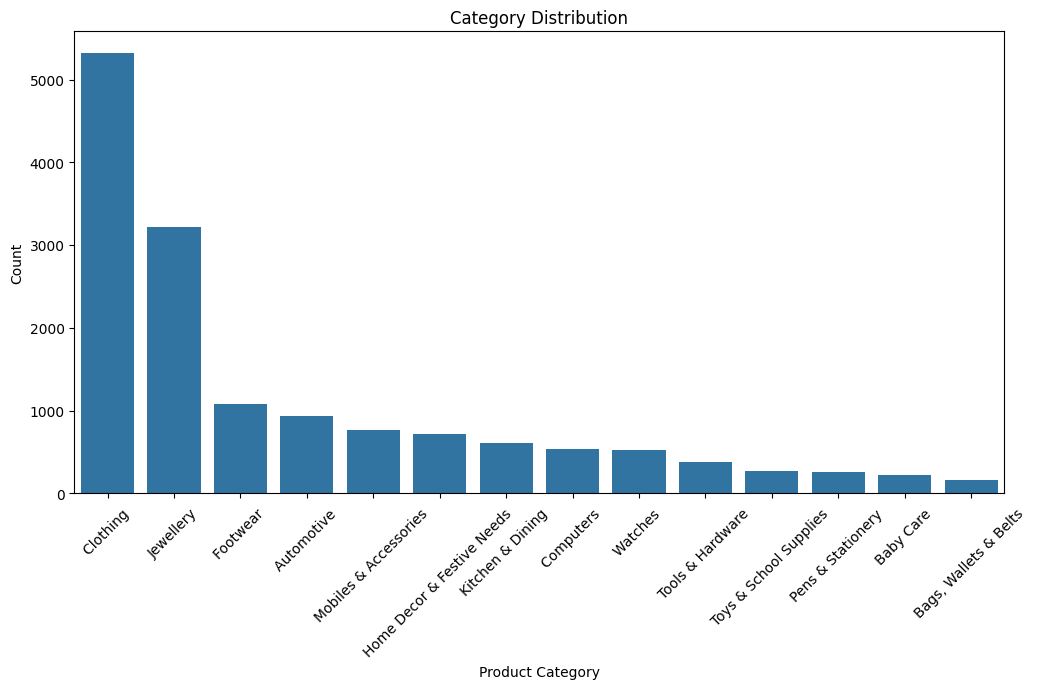

In [13]:
# Bar Chart for Category Distribution. A bar chart is ideal for visualizing the frequency of each category in product_category_tree.
plt.figure(figsize=(12, 6))
sns.countplot(x='product_category_tree', data=data, order=data['product_category_tree'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()

## Class Imbalance Handling:
### Balancing the Data:
 As we can see the target column has imbalanced data as the value counts of the categories are varying. So, balancing an imbalanced dataset can improve the performance of the machine learning models. Oversampling is one way to address the imbalance by increasing the representation of minority classes.

Here I am using Random Oversampling technique to oversample the data. This involves duplicating rows from the minority classes to match the size of the majority class.

In [14]:
from imblearn.over_sampling import RandomOverSampler
# Separating features and target
X = data['description'].fillna('')  # Ensure no missing values in the 'description' column
y = data['product_category_tree']

# Reshape X to a 2D array (if needed, for consistency with RandomOverSampler)
X = X.values.reshape(-1, 1)

# Initializing the RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

# Applying Random Oversampling
X_balanced, y_balanced = oversampler.fit_resample(X, y)

# Combining balanced Feature and Target columns into a single DataFrame
data_balanced = pd.DataFrame(X_balanced, columns=['description'])
data_balanced['product_category_tree'] = y_balanced

# Checking the balanced target class distribution
print("Balanced class distribution:")
print(data_balanced['product_category_tree'].value_counts())

Balanced class distribution:
product_category_tree
Clothing                       5315
Footwear                       5315
Pens & Stationery              5315
Bags, Wallets & Belts          5315
Home Decor & Festive Needs     5315
Automotive                     5315
Tools & Hardware               5315
Baby Care                      5315
Mobiles & Accessories          5315
Watches                        5315
Toys & School Supplies         5315
Jewellery                      5315
Kitchen & Dining               5315
Computers                      5315
Name: count, dtype: int64


In [15]:
# Checking the shape of the balanced data
print(data_balanced.shape)
# Checking top 5 rows of balanced data
data_balanced.head()

(74410, 2)


,description,product_category_tree
0,Key Features of Alisha Solid Women's Cycling S...,Clothing
1,Key Features of AW Bellies Sandals Wedges Heel...,Footwear
2,Key Features of Alisha Solid Women's Cycling S...,Clothing
3,Key Features of Alisha Solid Women's Cycling S...,Clothing
4,"Key Features of dilli bazaaar Bellies, Corpora...",Footwear


### Analizing the Description column

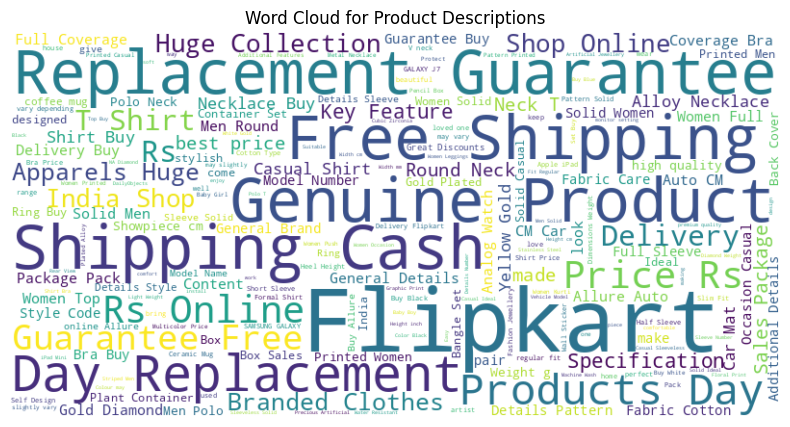

In [16]:
# Text Data Analysis - description column
# Combining all the descriptions into a single string
X_balanced = " ".join(data['description'].dropna())
# Generating the word cloud using WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(X_balanced)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Product Descriptions')
plt.show()

### Top Words Frequency
Identifying the most frequently occurring words in product descriptions.

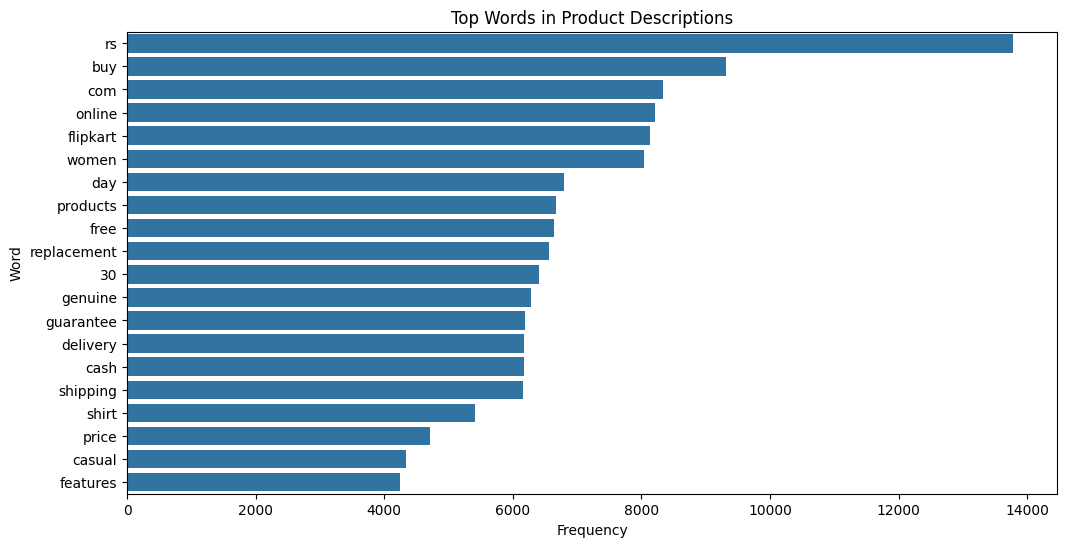

In [17]:
# Applying Vectorization for the transforming the textual data
vectorizer = CountVectorizer(stop_words='english', max_features=20) # Here we are using Count Vectorizer
word_counts = vectorizer.fit_transform(data['description'].dropna())
words = vectorizer.get_feature_names_out()
frequencies = word_counts.toarray().sum(axis=0)

# Creating a DataFrame for visualization
word_freq_data = pd.DataFrame({'word': words, 'frequency': frequencies}).sort_values(by='frequency', ascending=False)

# Plotting the top words
plt.figure(figsize=(12, 6))
sns.barplot(x='frequency', y='word', data=word_freq_data)
plt.title('Top Words in Product Descriptions')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


### Comparing the Mean Text Length for Each Product Category
Analyze the relationship between product categories and the mean text length of product descriptions.

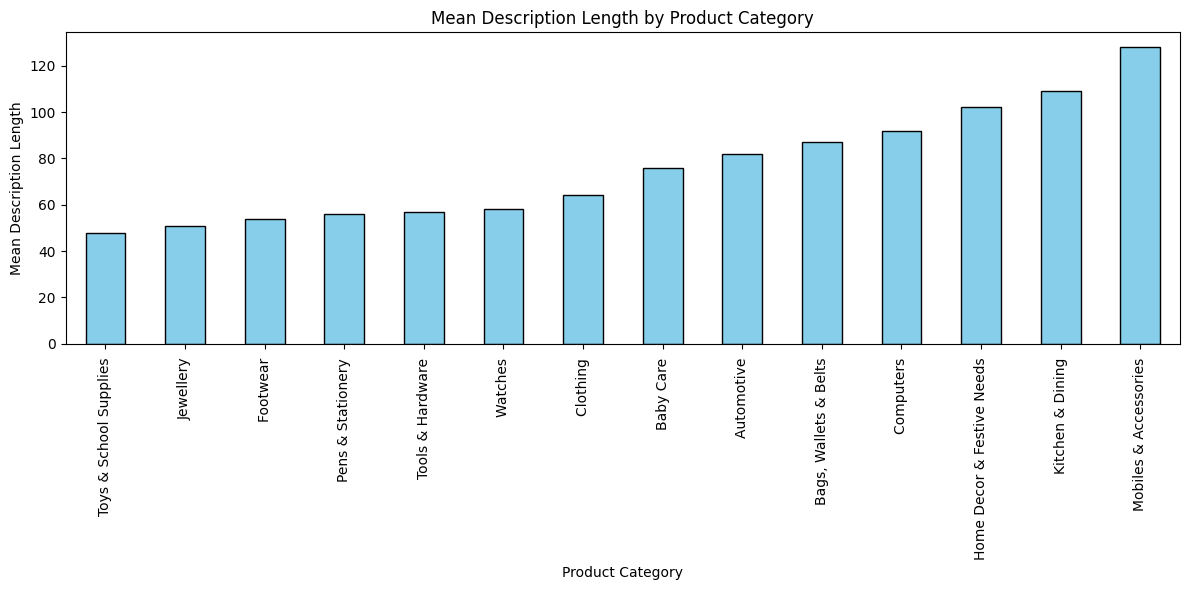

In [18]:
# Add a column for description length
data_balanced['description_length'] = data_balanced['description'].apply(lambda x: len(x.split(' ')))

# Calculate the mean text length for each category
mean_length = round(data_balanced.groupby('product_category_tree')['description_length'].mean().sort_values())

# Map the mean length back to the DataFrame
data_balanced['mean_length'] = data_balanced['product_category_tree'].map(mean_length)

# Create a bar chart
plt.figure(figsize=(12, 6))
mean_length.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Mean Description Length by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Mean Description Length')
plt.tight_layout()
plt.show()

The description words count varies from 50 to 125 with respect to the product categories.

### Distribution of Description Length
Visualizing the distribution of the lengths of product descriptions.

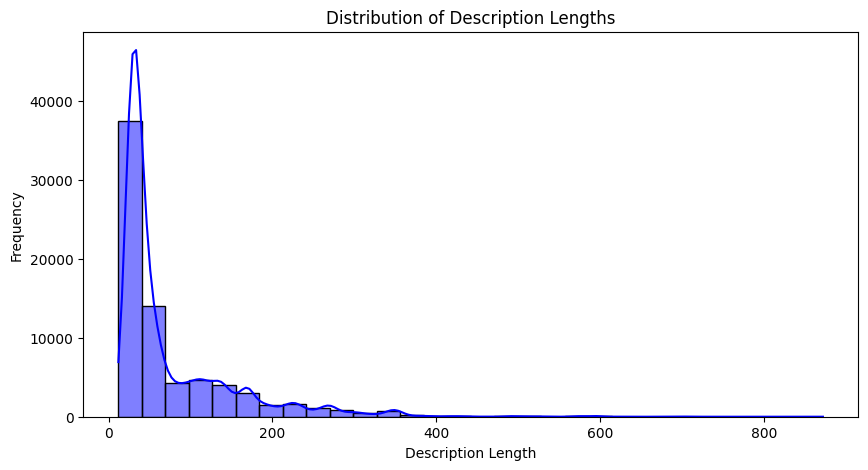

In [19]:
# Building Histogram to visualize the lengths of product descriptions
plt.figure(figsize=(10, 5))
sns.histplot(data_balanced['description_length'], kde=True, bins=30, color='blue')
plt.title('Distribution of Description Lengths')
plt.xlabel('Description Length')
plt.ylabel('Frequency')
plt.show()

From the visualization, we can observe that the description lengths of various categories are mostly below 200.

## Data Preprocessing:
### Working on Description Column:
To clean and preprocess the description column, we follow below steps:

#### Steps to Clean the Text:
1. Lowercase Conversion: Convert all text to lowercase.
2. Remove Punctuation: Eliminate punctuation marks.
3. Remove Numbers: Remove digits from the text.
4. Remove Stopwords: Remove common words like "and," "the," etc., using NLTK's stopwords.
5. Tokenization: Split the text into words (optional for more control).
6. Lemmatization: Convert words to their base forms.



In [20]:
# Initializing lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to clean description
def clean_description(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters, punctuation, and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize and remove stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]
    # Lemmatize each word
    words = [lemmatizer.lemmatize(word) for word in words]
    # Join back into a single string
    return ' '.join(words)

# Applying cleaning to the description column
data_balanced['cleaned_description'] = data_balanced['description'].apply(clean_description)

# Displaying a sample cleaned description
data_balanced[['description', 'cleaned_description']].head()


,description,cleaned_description
0,Key Features of Alisha Solid Women's Cycling S...,key feature alisha solid womens cycling short ...
1,Key Features of AW Bellies Sandals Wedges Heel...,key feature aw belly sandal wedge heel casuals...
2,Key Features of Alisha Solid Women's Cycling S...,key feature alisha solid womens cycling short ...
3,Key Features of Alisha Solid Women's Cycling S...,key feature alisha solid womens cycling short ...
4,"Key Features of dilli bazaaar Bellies, Corpora...",key feature dilli bazaaar belly corporate casu...


### Comparing the Mean Text Length for Each Product Category after cleaning the description
Analyze the relationship between product categories and the mean text length of product descriptions after cleaning.

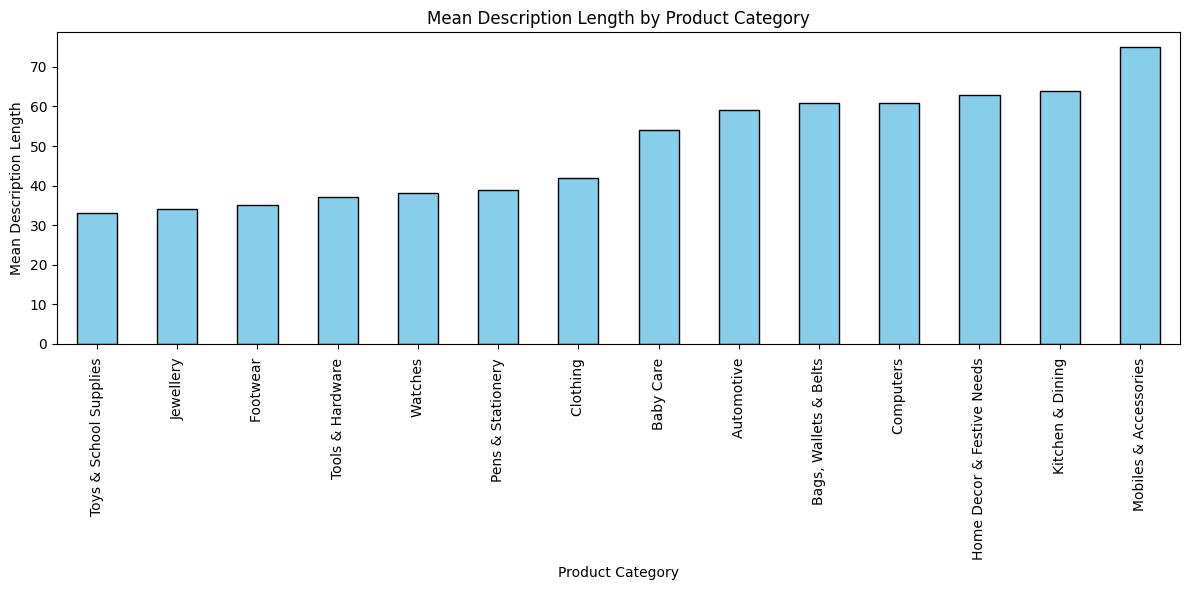

In [21]:
# Add a column for description length
data_balanced['description_length'] = data_balanced['cleaned_description'].apply(lambda x: len(x.split(' ')))

# Calculate the mean text length for each category
mean_length = round(data_balanced.groupby('product_category_tree')['description_length'].mean().sort_values())

# Map the mean length back to the DataFrame
data_balanced['mean_length'] = data_balanced['product_category_tree'].map(mean_length)

# Create a bar chart
plt.figure(figsize=(12, 6))
mean_length.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Mean Description Length by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Mean Description Length')
plt.tight_layout()
plt.show()

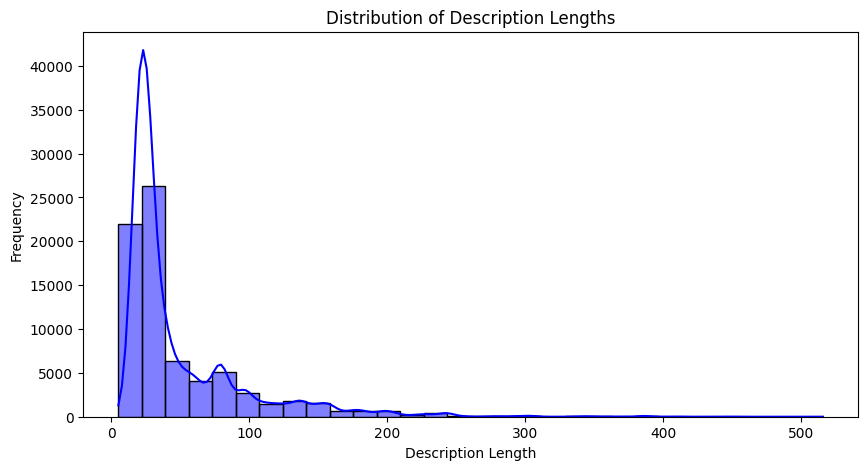

In [22]:
# Building Histogram to visualize the lengths of product descriptions
plt.figure(figsize=(10, 5))
sns.histplot(data_balanced['description_length'], kde=True, bins=30, color='blue')
plt.title('Distribution of Description Lengths')
plt.xlabel('Description Length')
plt.ylabel('Frequency')
plt.show()

As we can see, there is a lot of change in the text length of description after cleaning it.

## Splitting the Data into Train and Test
We should split the data before vectorization to avoid "data leakage." If we perform vectorization before splitting, the vectorizer may learn information from the entire dataset, including the test set, which can bias your results.

In [23]:
# Encoding target labels (product categories)
label_encoder = LabelEncoder()
data_balanced['category_encoded'] = label_encoder.fit_transform(data_balanced['product_category_tree'])

# Separating features and target
X = data_balanced['cleaned_description']
y = data_balanced['category_encoded']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Checking the shapes of the resulting splits
print("Training feature set size:", X_train.shape)
print("Testing feature set size:", X_test.shape)
print("Training target set size:", y_train.shape)
print("Testing target set size:", y_test.shape)

Training feature set size: (59528,)
Testing feature set size: (14882,)
Training target set size: (59528,)
Testing target set size: (14882,)


## Vectorization:
Here I am applying TF-IDF Vectorizer

In [24]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit on training data and transform both train and test sets
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Display the shapes of the resulting vectorized data
print("TF-IDF training set shape:", X_train_tfidf.shape)
print("TF-IDF testing set shape:", X_test_tfidf.shape)

TF-IDF training set shape: (59528, 5000)
TF-IDF testing set shape: (14882, 5000)


## Validation Test Data:
The test dataset provided without the product category column and given another dataset with only product category are used to validate the models with the predicted data and already given data and after finding the right model which gives good accuracy and f1 score on the data, we have add the predicted values as product category column to the test data provided.

For this, I am going to clean the description column by taking it seperately to X_vtest.

In [25]:
# Loading test data from csv file with pandas library
test_data = pd.read_csv("/content/drive/MyDrive/Upgrad_bootcamp/UpGrad_Hackathon/test_data.csv")
test_results = pd.read_csv("/content/drive/MyDrive/Upgrad_bootcamp/UpGrad_Hackathon/test_results.csv")

In [26]:
# We will work on test data first
# Checking the shape of the test data
print(test_data.shape)
# Checking the top 5 rows of the test data
test_data.head()

(2534, 14)


,uniq_id,crawl_timestamp,product_url,product_name,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,4fb99d98225f415e7ece96938e95628f,2015-12-20 08:26:17 +0000,http://www.flipkart.com/v-v-art-brass-bracelet...,V&V ART Brass Bracelet,BBAE6NYHCDTEZJTB,470.0,423.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,V&V ART Brass Bracelet - Buy V&V ART Brass Bra...,No rating available,No rating available,V&V ART,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,4ea284c8d38b2ea97a1c2a26f34e057c,2015-12-20 08:26:17 +0000,http://www.flipkart.com/kalpaveda-copper-cuff/...,Kalpaveda Copper Copper Cuff,BBAEDFFKZJTY7SZZ,1200.0,1200.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,Kalpaveda Copper Copper Cuff\n ...,No rating available,No rating available,Kalpaveda,"{""product_specification""=>[{""key""=>""Stretchabl..."
2,ee6ce2c7045c54257e2a0b590e09c296,2015-12-20 08:26:17 +0000,http://www.flipkart.com/thelostpuppy-book-cove...,Thelostpuppy Book Cover for Apple iPad Air,ACCEA4DZH6M5SFVH,2199.0,599.0,"[""http://img5a.flixcart.com/image/cases-covers...",False,Thelostpuppy Book Cover for Apple iPad Air (Mu...,No rating available,No rating available,Thelostpuppy,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
3,e797ba3b5f2e2d1fdc520e48486ab60e,2015-12-20 08:26:17 +0000,http://www.flipkart.com/riana-copper-bangle/p/...,Riana Copper Copper Bangle,BBAEAXFQHHMF3EYZ,2499.0,649.0,"[""http://img5a.flixcart.com/image/bangle-brace...",False,Riana Copper Copper Bangle - Buy Riana Copper ...,5,5,Riana,"{""product_specification""=>[{""key""=>""Collection..."
4,f4d8d43858c8858c68d75ce07ac641c0,2015-12-20 08:26:17 +0000,http://www.flipkart.com/inox-jewelry-stainless...,Inox Jewelry Stainless Steel Cuff,BBAECH63WYDG6TE2,1629.0,1222.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,Inox Jewelry Stainless Steel Cuff\n ...,No rating available,No rating available,Inox Jewelry,"{""product_specification""=>[{""key""=>""Stretchabl..."


In [27]:
# Considering the description column to the X_vtest
X_vtest = test_data[['description']]
# Again taking a glimpse on the description column
X_vtest.head()

,description
0,V&V ART Brass Bracelet - Buy V&V ART Brass Bra...
1,Kalpaveda Copper Copper Cuff\n ...
2,Thelostpuppy Book Cover for Apple iPad Air (Mu...
3,Riana Copper Copper Bangle - Buy Riana Copper ...
4,Inox Jewelry Stainless Steel Cuff\n ...


In [28]:
# Checking the shape of the X_vtest data frame
X_vtest.shape

(2534, 1)

In [29]:
# Checking for missing values
X_vtest.isnull().sum()

,0
description,0


There are no missing values in the description column.

In [30]:
# Cleaning the description column
X_vtest['cleaned_description'] = X_vtest['description'].apply(clean_description)

In [31]:
# Let's drop the description column and keep cleaned description for futher evaluation
X_vtest = X_vtest.drop('description', axis=1)

In [32]:
# Vectorizing the cleaned description column using the trained TF-IDF vectorizer
X_vtest_tfidf = tfidf_vectorizer.transform(X_vtest['cleaned_description'])

Now, Working on the test results data set

In [33]:
# First we check the data and clean it if necessary
print(test_results.shape) # Ensuring the number of rows present in test_data and test_results are same
# Checking the top 5 rows
test_results.head()

(2534, 1)


,product_category_tree
0,Jewellery
1,Jewellery
2,Mobiles & Accessories
3,Jewellery
4,Jewellery


In [34]:
# Checking for missing values
test_results.isnull().sum()

,0
product_category_tree,0


In [35]:
# Encoding the product category tree column
label_encoder = LabelEncoder()
test_results['category_encoded'] = label_encoder.fit_transform(test_results['product_category_tree'])

In [36]:
# Taking the encoded category into the y_vtest
y_vtest = test_results['category_encoded']
y_vtest.shape

(2534,)

## Model Selection & Model Building:
For text classification projects, common options include:
1. Logistic Regression
2. Random Forest
3. Support Vector Machines (SVM)
4. Naive Bayes
5. Gradient Boosting (e.g., XGBoost, LightGBM)
6. Deep Learning (e.g., Neural Networks with Keras/TensorFlow)

### Evaluation Metrics:
Accuracy, precision, recall, F1 score.
Confusion matrix with category names.

### Hyperparameter Tuning:
Optimized models using grid search for parameters like learning rate, regularization, and depth.

Here I will use one by one models and Compare the results of all at last.

### 1. Logistic Regression Model
A simple and efficient model for text classification.
Works well with high-dimensional data like text after TF-IDF or Count Vectorization.
Fast to train and interpret.

In [37]:
# Initializing Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Training the model
log_reg.fit(X_train_tfidf, y_train)

# Predicting with the test data
y_pred = log_reg.predict(X_test_tfidf)

# Evaluating the model and printing the results
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")

Logistic Regression Performance:
Accuracy: 0.9933
F1 Score: 0.9933
Precision: 0.9933
Recall: 0.9933


As we can see the results of the model are good, Let's plot confusion matrix for this model and check.

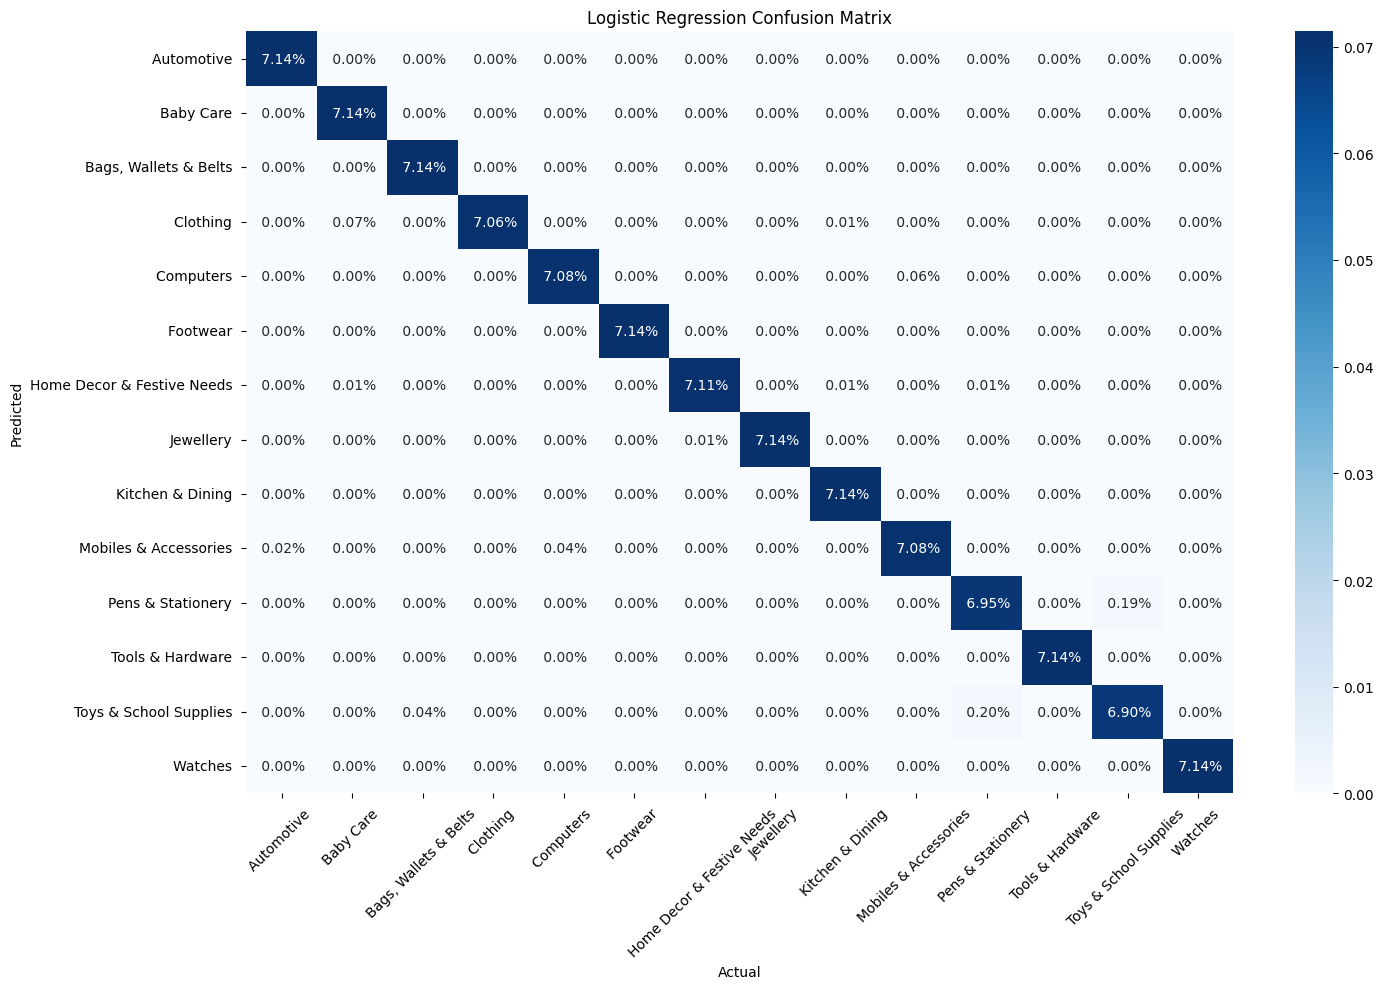

In [38]:
 # category names from the encoder
category_names = label_encoder.classes_

# Generating the confusion matrix
lr_cnf_mtrx = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(15, 10))
ax = sns.heatmap(lr_cnf_mtrx / np.sum(lr_cnf_mtrx), annot=True, fmt=' .2%', cmap='Blues',
                 xticklabels=category_names, yticklabels=category_names)

# Setting labels and title
ax.set_title("Logistic Regression Confusion Matrix")
ax.set_xlabel('Actual')
ax.set_ylabel("Predicted")

# To rotate the tick labels for better readability
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

Now, let's tune the model with hyperparameter tuning with the help of GridSearchCV

In [39]:
# Parameter grid
param_grid = {"C": [0.01, 0.1, 1, 10], "solver": ["liblinear", "lbfgs"]}

# Initializing GridSearch
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=3, scoring="accuracy")
grid_search.fit(X_train_tfidf, y_train)

# Best model for the evaluation
best_log_reg = grid_search.best_estimator_

# Predicting with the tuned model
y_pred_tuned = best_log_reg.predict(X_test_tfidf)

# Evaluating the best model and Printing the results
print("Tuned Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_tuned, average='weighted'):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_tuned, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_tuned, average='weighted'):.4f}")


Tuned Logistic Regression Performance:
Accuracy: 0.9957
F1 Score: 0.9957
Precision: 0.9957
Recall: 0.9957


Now, let's predict the X_vtest data with the best model from tuned model

In [40]:
y_vpred = best_log_reg.predict(X_vtest_tfidf)

In [41]:
# Evaluating the best model on test data and Printing the results for test data
print("Tuned Logistic Regression Performance on Test data:")
print(f"Accuracy: {accuracy_score(y_vtest, y_vpred):.4f}")
print(f"F1 Score: {f1_score(y_vtest, y_vpred, average='weighted'):.4f}")
print(f"Precision: {precision_score(y_vtest, y_vpred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_vtest, y_vpred, average='weighted'):.4f}")

Tuned Logistic Regression Performance on Test data:
Accuracy: 0.8512
F1 Score: 0.8279
Precision: 0.8446
Recall: 0.8512


The model is predicting on the test data is fine and the acuuracy we got is good.

Now we proceed further with other models and check how they work.

### 2. Random Forest Classification Model
An ensemble learning method based on decision trees.
Handles imbalanced data well.
Robust against overfitting due to averaging across multiple trees.

In [42]:
# Initializing Random Forest Model
rf = RandomForestClassifier(random_state=42)

# Training the model
rf.fit(X_train_tfidf, y_train)

# Predicting with the test data
y_pred = rf.predict(X_test_tfidf)

# Evaluating the model and Printing the results
print("Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")

Random Forest Performance:
Accuracy: 0.9969
F1 Score: 0.9969
Precision: 0.9969
Recall: 0.9969


As we can see the results of the model are good, Let's plot confusion matrix for this model and check.

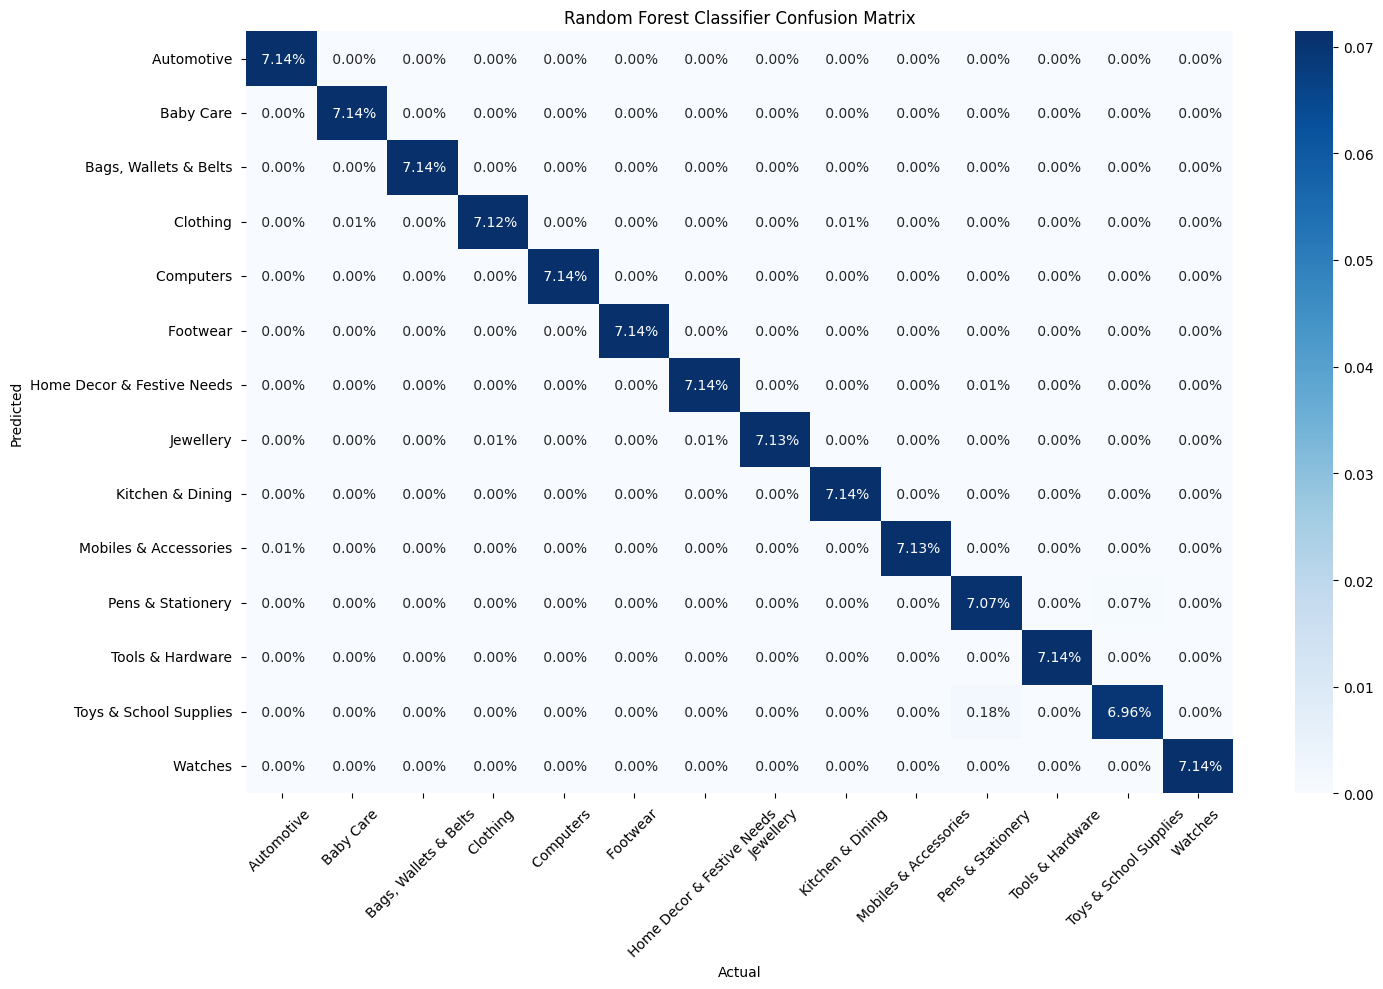

In [43]:
 # Category names from the encoder
category_names = label_encoder.classes_

# Generating the confusion matrix
rfc_cnf_mtrx = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(15, 10))
ax = sns.heatmap(rfc_cnf_mtrx / np.sum(rfc_cnf_mtrx), annot=True, fmt=' .2%', cmap='Blues',
                 xticklabels=category_names, yticklabels=category_names)

# Setting labels and title
ax.set_title("Random Forest Classifier Confusion Matrix")
ax.set_xlabel('Actual')
ax.set_ylabel("Predicted")

# To rotate the tick labels for better readability
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

Now, let's tune the model with hyperparameter tuning with the help of GridSearchCV

In [44]:
# Parameter grid
param_grid = {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20, 30]}

# Initializing GridSearch
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring="accuracy")
grid_search.fit(X_train_tfidf, y_train)

# Finding the best model
best_rf = grid_search.best_estimator_

# Predicting with the tuned model
y_pred_tuned = best_rf.predict(X_test_tfidf)

# Evaluating the best model after tuning and Printing the results
print("Tuned Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_tuned, average='weighted'):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_tuned, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_tuned, average='weighted'):.4f}")

Tuned Random Forest Performance:
Accuracy: 0.9969
F1 Score: 0.9969
Precision: 0.9969
Recall: 0.9969


As we can see after tuning also we got the simialr accuracy, it means the maximum accuracy from this model is same.


Now, let's predict the X_vtest data with the best model from tuned model.

In [45]:
# Predicting with the tuned model on the test data
y_vpred = best_rf.predict(X_vtest_tfidf)

In [46]:
# Evaluating the best model after tuning on the test data and Printing the results
print("Tuned Random Forest Performance on the test data:")
print(f"Accuracy: {accuracy_score(y_vtest, y_vpred):.4f}")
print(f"F1 Score: {f1_score(y_vtest, y_vpred, average='weighted'):.4f}")
print(f"Precision: {precision_score(y_vtest, y_vpred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_vtest, y_vpred, average='weighted'):.4f}")

Tuned Random Forest Performance on the test data:
Accuracy: 0.8433
F1 Score: 0.8178
Precision: 0.8661
Recall: 0.8433


The model is predicting on the test data is fine and the acuuracy we got is good.

Now we proceed further with SVM and check how it work.

### 3. Support Vector Machine Classifier
A powerful algorithm for classification tasks with a clear decision boundary.
Effective in high-dimensional spaces.
Works well with sparse datasets (like TF-IDF vectors).

In [47]:
# Initializing SVM Model
svm = SVC(probability=True, random_state=42)

# Training the model
svm.fit(X_train_tfidf, y_train)

# Predicting on the test data
y_pred = svm.predict(X_test_tfidf)

# Evaluating the model and Printing the reulsts
print("SVM Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")

SVM Performance:
Accuracy: 0.9967
F1 Score: 0.9967
Precision: 0.9967
Recall: 0.9967


As we can see the results of the model are good, Let's plot confusion matrix for this model and check.

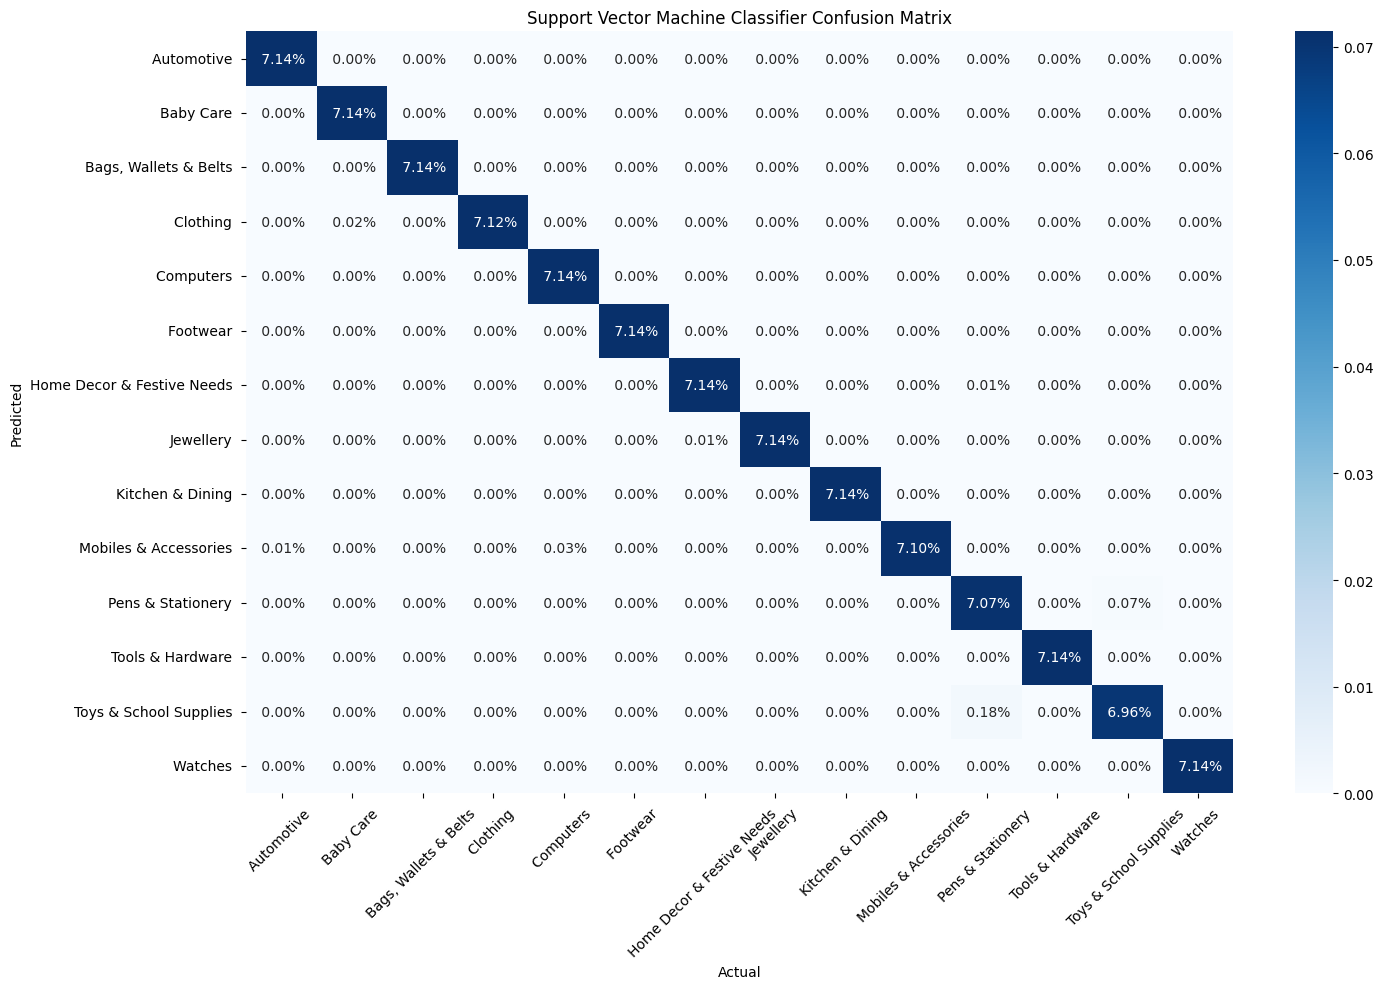

In [48]:
 # Category names from the encoder
category_names = label_encoder.classes_

# Generating the confusion matrix
svc_cnf_mtrx = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(15, 10))
ax = sns.heatmap(svc_cnf_mtrx / np.sum(svc_cnf_mtrx), annot=True, fmt=' .2%', cmap='Blues',
                 xticklabels=category_names, yticklabels=category_names)

# Setting labels and title
ax.set_title("Support Vector Machine Classifier Confusion Matrix")
ax.set_xlabel('Actual')
ax.set_ylabel("Predicted")

# To rotate the tick labels for better readability
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

As, we see the accuracy and f1score we got from the initial model is nearly 100, So I am not performing hyperparameter tuning for this model


Now, let's predict the X_vtest data with the SVM Model.

In [49]:
# Predicting with the tuned model on the test data
y_vpred = svm.predict(X_vtest_tfidf)

In [50]:
# Evaluating the model after tuning with test data and printing the results
print("Tuned SVM Performance on the test data:")
print(f"Accuracy: {accuracy_score(y_vtest, y_vpred):.4f}")
print(f"F1 Score: {f1_score(y_vtest, y_vpred, average='weighted'):.4f}")
print(f"Precision: {precision_score(y_vtest, y_vpred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_vtest, y_vpred, average='weighted'):.4f}")

Tuned SVM Performance on the test data:
Accuracy: 0.8516
F1 Score: 0.8229
Precision: 0.8547
Recall: 0.8516


The model is predicting on the test data is fine and the acuuracy we got is good.

Now we proceed further with Naive Bayes Multinomial and check how it work.

### 4. Naive Bayes Multinomial Classification
A probabilistic model based on Bayes' theorem.
Simple and fast for text data.
Works well with small datasets.

In [51]:
# Initializing Naive Bayes
nb = MultinomialNB()

# Training the model
nb.fit(X_train_tfidf, y_train)

# Predicting on the test data
y_pred = nb.predict(X_test_tfidf)

# Evaluating the model and printing the results
print("Naive Bayes Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")

Naive Bayes Performance:
Accuracy: 0.9710
F1 Score: 0.9710
Precision: 0.9729
Recall: 0.9710


As we can see the results of the model are good, Let's plot confusion matrix for this model and check.

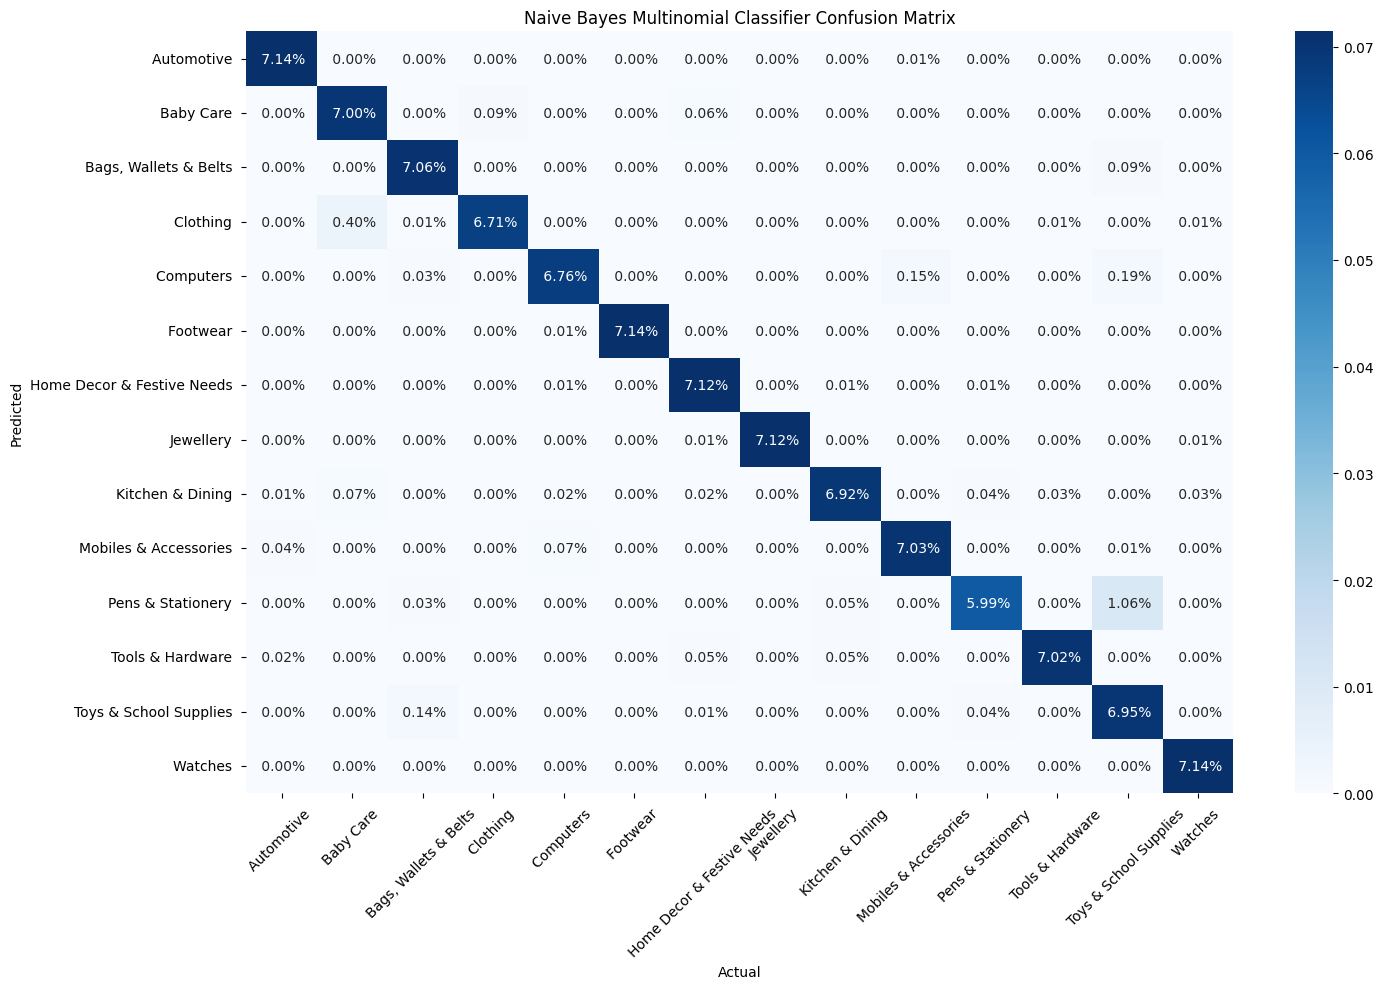

In [52]:
 # Get category names from the encoder
category_names = label_encoder.classes_

# Generate the confusion matrix
mnb_cnf_mtrx = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(15, 10))
ax = sns.heatmap(mnb_cnf_mtrx / np.sum(mnb_cnf_mtrx), annot=True, fmt=' .2%', cmap='Blues',
                 xticklabels=category_names, yticklabels=category_names)

# Set labels and title
ax.set_title("Naive Bayes Multinomial Classifier Confusion Matrix")
ax.set_xlabel('Actual')
ax.set_ylabel("Predicted")

# Rotate the tick labels for better readability
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

Now, let's predict the model on the test data and evaluate the predictions.

In [53]:
# Predicting on the test data
y_vpred = nb.predict(X_vtest_tfidf)

In [54]:
# Evaluating the model on the test data and printing the results
print("Naive Bayes Performance on the test data:")
print(f"Accuracy: {accuracy_score(y_vtest, y_vpred):.4f}")
print(f"F1 Score: {f1_score(y_vtest, y_vpred, average='weighted'):.4f}")
print(f"Precision: {precision_score(y_vtest, y_vpred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_vtest, y_vpred, average='weighted'):.4f}")

Naive Bayes Performance on the test data:
Accuracy: 0.8007
F1 Score: 0.8008
Precision: 0.8204
Recall: 0.8007



The model is predicting on the test data is fine and the acuuracy we got is good.

Now we proceed further with XGBoost and check how it work.

### 5. XGBoost Classifier
Boosting algorithms that sequentially improve weak learners.
Highly effective for imbalanced and complex datasets.
Can capture non-linear patterns in data.

In [55]:
# Initializing XGBoost Model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Training the model
xgb.fit(X_train_tfidf, y_train)

# Predicting with the test data
y_pred = xgb.predict(X_test_tfidf)

# Evaluating the model and printing the results
print("XGBoost Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")

XGBoost Performance:
Accuracy: 0.9967
F1 Score: 0.9967
Precision: 0.9967
Recall: 0.9967


As we can see the results of the model are good, Let's plot confusion matrix for this model and check.

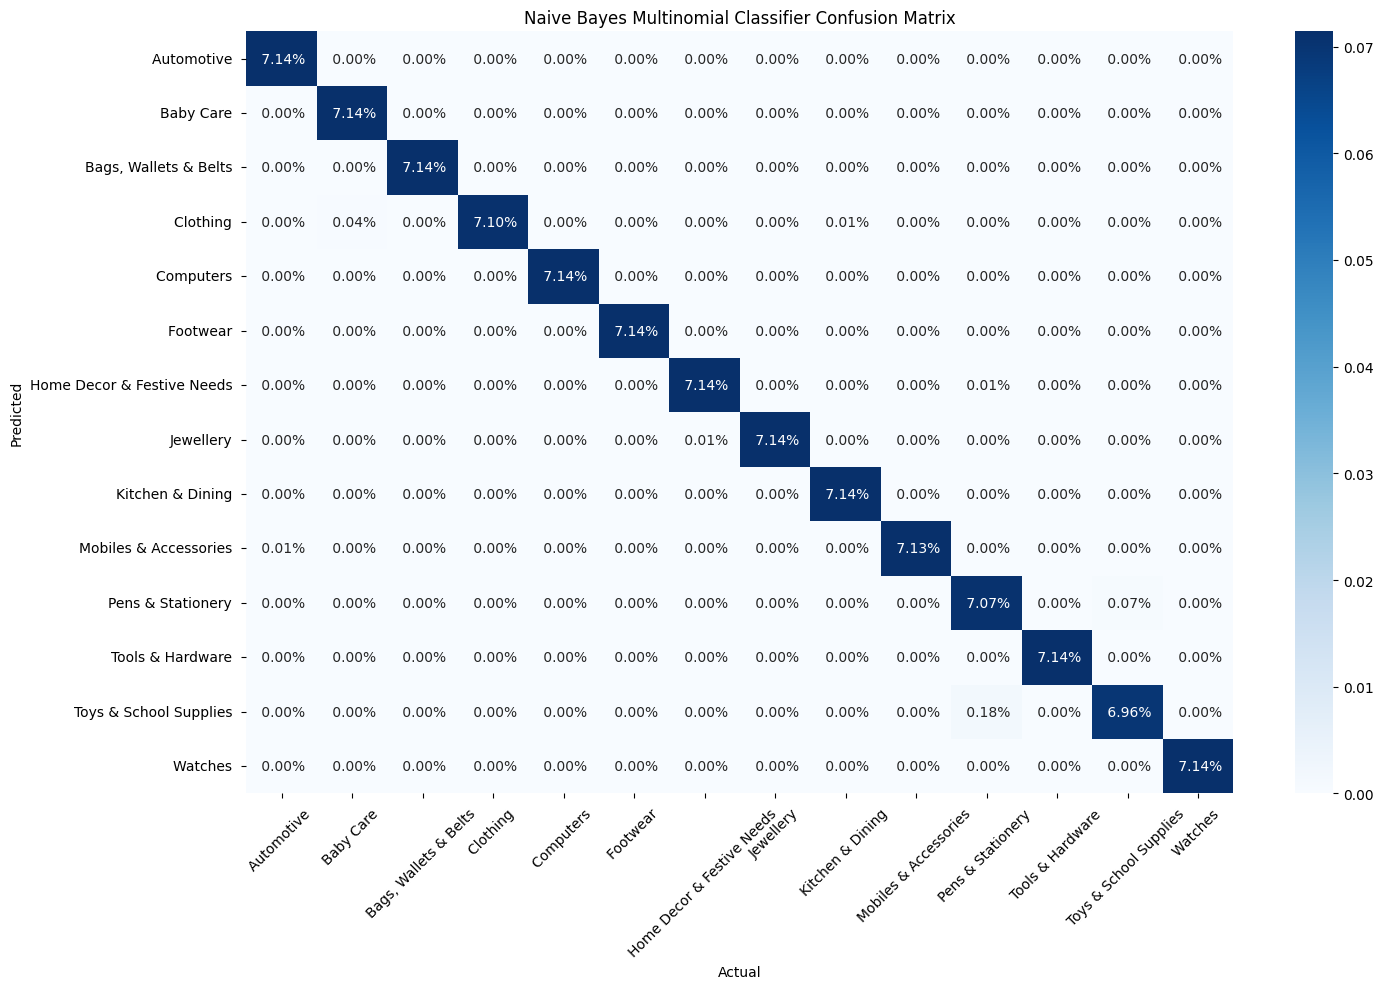

In [56]:
# Category names from the encoder
category_names = label_encoder.classes_

# Generating the confusion matrix
xgb_cnf_mtrx = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(15, 10))
ax = sns.heatmap(xgb_cnf_mtrx / np.sum(xgb_cnf_mtrx), annot=True, fmt=' .2%', cmap='Blues',
                 xticklabels=category_names, yticklabels=category_names)

# Setting labels and title
ax.set_title("Naive Bayes Multinomial Classifier Confusion Matrix")
ax.set_xlabel('Actual')
ax.set_ylabel("Predicted")

# To rotate the tick labels for better readability
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

As the accuracy and f1 score we got from the initial model is almost 100. I am not performing Hyperparameter tuning due to time constraint.

Now, let's predict the X_vtest data with the XGBoost model.

In [57]:
# Predicting with the tuned model on the test data
y_vpred = xgb.predict(X_vtest_tfidf)

In [58]:
# Evaluating the tuned model on the test data and printing the results
print("Tuned XGBoost Performance on the test data:")
print(f"Accuracy: {accuracy_score(y_vtest, y_vpred):.4f}")
print(f"F1 Score: {f1_score(y_vtest, y_vpred, average='weighted'):.4f}")
print(f"Precision: {precision_score(y_vtest, y_vpred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_vtest, y_vpred, average='weighted'):.4f}")

Tuned XGBoost Performance on the test data:
Accuracy: 0.8564
F1 Score: 0.8411
Precision: 0.8747
Recall: 0.8564


The model is predicting on the test data is fine and the acuuracy we got is good.

Now we proceed further with the Deep Learning Models (LSTM) and check how it work.

### Deep Learning Model - LSTM
A recurrent neural network (RNN) model specialized for sequential data like text.
Captures long-term dependencies in text data.
Handles large datasets and complex patterns effectively.

In [59]:
# Parameters
max_features = 5000  # Number of unique words to consider
max_length = 200  # Maximum length of a sequence
embedding_dim = 128  # Dimension of word embeddings

In [60]:
# Tokenizing the text
tokenizer = Tokenizer(num_words=max_features, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)  # This will fit tokenizer on training data
X_train_seq = tokenizer.texts_to_sequences(X_train)  # Converts text to sequences
X_test_seq = tokenizer.texts_to_sequences(X_test)  # Converts test text to sequences

In [61]:
# Padding sequences to ensure consistent input shape
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

In [62]:
# Defining the LSTM model
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=max_length))
model.add(Bidirectional(LSTM(64, return_sequences=True)))  # Bidirectional LSTM for context
model.add(Dropout(0.3))
model.add(LSTM(32))  # Additional LSTM layer
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))  # Dense layer
model.add(Dense(len(np.unique(y_train)), activation='softmax'))  # Output layer with softmax

In [63]:
# Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [64]:
# Training the model
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_data=(X_test_pad, y_test), verbose=1)

Epoch 1/10
1861/1861 ━━━━━━━━━━━━━━━━━━━━ 56s 25ms/step - accuracy: 0.0871 - loss: 2.6077 - val_accuracy: 0.4643 - val_loss: 1.3846
Epoch 2/10
1861/1861 ━━━━━━━━━━━━━━━━━━━━ 76s 25ms/step - accuracy: 0.6298 - loss: 0.9002 - val_accuracy: 0.8452 - val_loss: 0.2808
Epoch 3/10
1861/1861 ━━━━━━━━━━━━━━━━━━━━ 82s 25ms/step - accuracy: 0.8391 - loss: 0.3101 - val_accuracy: 0.8567 - val_loss: 0.2350
Epoch 4/10
1861/1861 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.8758 - loss: 0.2444 - val_accuracy: 0.9159 - val_loss: 0.1563
Epoch 5/10
1861/1861 ━━━━━━━━━━━━━━━━━━━━ 83s 26ms/step - accuracy: 0.9126 - loss: 0.1753 - val_accuracy: 0.9221 - val_loss: 0.1297
Epoch 6/10
1861/1861 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.9599 - loss: 0.1010 - val_accuracy: 0.9935 - val_loss: 0.0280
Epoch 7/10
1861/1861 ━━━━━━━━━━━━━━━━━━━━ 82s 25ms/step - accuracy: 0.9884 - loss: 0.0478 - val_accuracy: 0.9933 - val_loss: 0.0194
Epoch 8/10
1861/1861 ━━━━━━━━━━━━━━━━━━━━ 86s 28ms/step - accuracy: 0.9920 -

In [65]:
# Evaluating the model
y_pred_prob = model.predict(X_test_pad)
y_pred = np.argmax(y_pred_prob, axis=1)
# Printing the accuracy and classification report of the model
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

466/466 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step

Accuracy: 0.9954979169466469

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1063
           1       0.99      1.00      1.00      1063
           2       1.00      1.00      1.00      1063
           3       1.00      0.99      0.99      1063
           4       1.00      1.00      1.00      1063
           5       1.00      1.00      1.00      1063
           6       1.00      1.00      1.00      1063
           7       1.00      1.00      1.00      1063
           8       1.00      1.00      1.00      1063
           9       1.00      0.99      1.00      1063
          10       0.96      1.00      0.98      1063
          11       1.00      1.00      1.00      1063
          12       1.00      0.96      0.98      1063
          13       1.00      1.00      1.00      1063

    accuracy                           1.00     14882
   macro avg       1.00      1.00     

In [66]:
# Saving the model
model.save('lstm_text_classifier.h5')

### LSTM Model Architecture Breakdown

####Sequential:
This is a linear stack of layers where the output of one layer feeds directly into the next. It allows for building deep learning models layer by layer.

####Embedding Layer
- Purpose: Converts integer-encoded words (from the vocabulary) into dense vector representations (embeddings).
- Parameters:
  - `input_dim`: The vocabulary size (number of unique tokens).
  - `output_dim`: The dimensionality of the embedding space (how many features each word will be represented with).
  - `input_length`: The length of input sequences (number of words in each input).

####First LSTM Layer
- LSTM(units=128, return_sequences=True):  
  Adds an LSTM (Long Short-Term Memory) layer with 128 units.  
  - `return_sequences=True`: Ensures the layer outputs the full sequence of hidden states for each time step, allowing stacking of more LSTM layers.
- Dropout(0.2):  
  Introduces noise by randomly setting 20% of the input units to zero during training to prevent overfitting.

####Second LSTM Layer
- LSTM(units=64, return_sequences=False):  
  Adds another LSTM layer with 64 units.  
  - `return_sequences=False`: Outputs only the last hidden state, reducing dimensionality for further layers.
- Dropout(0.2):  
  Further reduces overfitting and encourages the model to learn robust patterns.

#### Dense Layer
- Dense(units=len(unique_labels), activation='softmax'):
  - Purpose: Outputs probabilities for each class (multi-class classification).  
  - `len(unique_labels)`: The number of unique labels (categories) in the target.
  - `activation='softmax'`: Converts raw outputs into a probability distribution across classes.

#### Tuning the LSTM Model

In [67]:
# Function to build the LSTM model with customizable parameters
def build_lstm_model(lstm_units=64, dropout_rate=0.3, embedding_dim=128, learning_rate=0.001):
    model = Sequential()
    model.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=max_length))
    model.add(Bidirectional(LSTM(lstm_units, return_sequences=True)))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(lstm_units // 2))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(len(np.unique(y_train)), activation='softmax'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [68]:
# List of hyperparameters to test
params = [
    {"lstm_units": 64, "dropout_rate": 0.3, "embedding_dim": 128, "learning_rate": 0.001},
    {"lstm_units": 128, "dropout_rate": 0.4, "embedding_dim": 256, "learning_rate": 0.0005},
    {"lstm_units": 32, "dropout_rate": 0.2, "embedding_dim": 64, "learning_rate": 0.01},
]

best_accuracy = 0
best_model = None
best_params = None

In [69]:
# Fine-tuning loop
for param_set in params:
    print(f"Training with params: {param_set}")
    model = build_lstm_model(**param_set)
    history = model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test), verbose=1)

    y_pred_prob = model.predict(X_test_pad)
    y_pred = np.argmax(y_pred_prob, axis=1)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy for params {param_set}: {accuracy}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_params = param_set
print("\nBest Parameters:", best_params)
print("Best Accuracy:", best_accuracy)
# Save the best model
best_model.save('lstm_text_classifier_tuned.h5')

Training with params: {'lstm_units': 64, 'dropout_rate': 0.3, 'embedding_dim': 128, 'learning_rate': 0.001}
Epoch 1/5
1861/1861 ━━━━━━━━━━━━━━━━━━━━ 51s 25ms/step - accuracy: 0.0790 - loss: 2.6294 - val_accuracy: 0.0827 - val_loss: 2.6090
Epoch 2/5
1861/1861 ━━━━━━━━━━━━━━━━━━━━ 84s 27ms/step - accuracy: 0.1186 - loss: 2.4407 - val_accuracy: 0.3334 - val_loss: 1.4369
Epoch 3/5
1861/1861 ━━━━━━━━━━━━━━━━━━━━ 79s 25ms/step - accuracy: 0.3922 - loss: 1.3222 - val_accuracy: 0.6386 - val_loss: 0.6987
Epoch 4/5
1861/1861 ━━━━━━━━━━━━━━━━━━━━ 82s 25ms/step - accuracy: 0.6705 - loss: 0.6902 - val_accuracy: 0.6955 - val_loss: 0.6251
Epoch 5/5
1861/1861 ━━━━━━━━━━━━━━━━━━━━ 82s 25ms/step - accuracy: 0.7942 - loss: 0.4651 - val_accuracy: 0.9708 - val_loss: 0.1192
466/466 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step
Accuracy for params {'lstm_units': 64, 'dropout_rate': 0.3, 'embedding_dim': 128, 'learning_rate': 0.001}: 0.9708372530573848
Training with params: {'lstm_units': 128, 'dropout_rate': 0.4, 'embedd

Accuracy for params {'lstm_units': 32, 'dropout_rate': 0.2, 'embedding_dim': 64, 'learning_rate': 0.01}: 0.9368364467141513

Best Parameters: {'lstm_units': 64, 'dropout_rate': 0.3, 'embedding_dim': 128, 'learning_rate': 0.001}
Best Accuracy: 0.9708372530573848


In [70]:
# Evaluating the tuned model on test data
y_pred_prob = best_model.predict(X_test_pad)
y_pred = np.argmax(y_pred_prob, axis=1)

print("\nAccuracy after tuning:", accuracy_score(y_test, y_pred))
print("\nClassification Report after tuning:\n", classification_report(y_test, y_pred))

466/466 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step

Accuracy after tuning: 0.9708372530573848

Classification Report after tuning:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1063
           1       0.98      0.99      0.98      1063
           2       0.99      1.00      0.99      1063
           3       1.00      0.97      0.98      1063
           4       0.99      0.99      0.99      1063
           5       1.00      1.00      1.00      1063
           6       0.96      0.99      0.97      1063
           7       1.00      0.99      0.99      1063
           8       0.99      0.97      0.98      1063
           9       1.00      0.99      0.99      1063
          10       0.93      0.79      0.86      1063
          11       1.00      0.98      0.99      1063
          12       0.82      0.94      0.88      1063
          13       0.99      1.00      0.99      1063

    accuracy                           0.97     14882
   macro av

#### Visualizing the Confusion Matrix

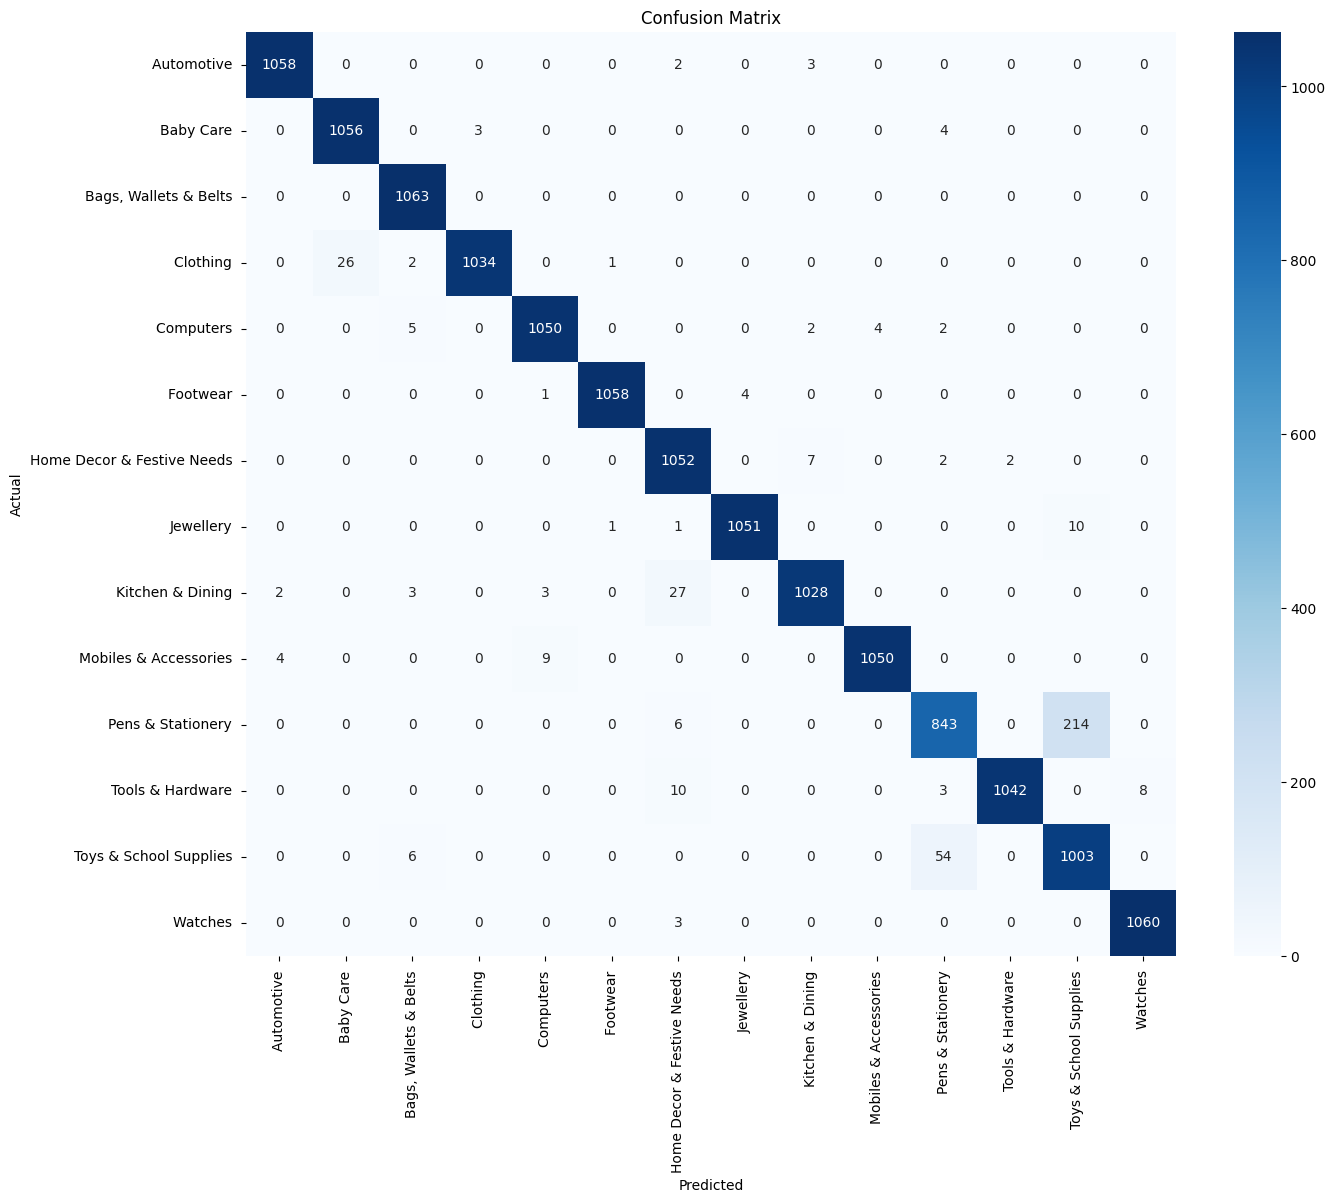

In [71]:
# Confusion Matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15, 12))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=category_names, yticklabels=category_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Preparing the Validation test data and predicting with LSTM Model

In [79]:
# Flattening X_vtest as it is a pandas DataFrame (2534, 1)
X_vtest = X_vtest.values.flatten()

# Converting test texts to sequences
X_vtest_seq = tokenizer.texts_to_sequences(X_vtest)

# Padding sequences to ensure consistent input shape for all samples
X_vtest_pad = pad_sequences(X_vtest_seq, maxlen=max_length, padding='post', truncating='post')

# Checking the shape of the padded test set
print("Shape of X_vtest_pad:", X_vtest_pad.shape)  # This should be (2534, max_length)

# Predicting on all test samples
y_vpred_prob = model.predict(X_vtest_pad)

# Checking the shape of the predictions
print("Shape of y_vpred_prob:", y_vpred_prob.shape)  # This should be (2534, num_classes)

# Getting predicted class labels
y_vpred = np.argmax(y_vpred_prob, axis=1)

# Checking the shape of the final predictions
print("Shape of y_vpred:", y_vpred.shape)  # This should be (2534,)

# Computing accuracy and classification report
print("\nAccuracy:", accuracy_score(y_vtest, y_vpred))
print("\nClassification Report:\n", classification_report(y_vtest, y_vpred))

Shape of X_vtest_pad: (2534, 200)
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Shape of y_vpred_prob: (2534, 14)
Shape of y_vpred: (2534,)

Accuracy: 0.7600631412786109

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.71      0.63        75
           1       0.69      0.18      0.28       259
           2       0.84      0.82      0.83       107
           3       0.98      0.91      0.94       882
           4       0.08      0.21      0.11        47
           5       0.72      0.98      0.83       144
           6       0.40      0.67      0.50       215
           7       0.92      0.82      0.87       313
           8       0.71      0.46      0.56        37
           9       0.97      0.91      0.94       331
          10       0.22      0.45      0.29        49
          11       0.00      0.00      0.00        12
          12       0.90      0.73      0.80        59
          13       0.29      0.50      0.36         4


As we see, LSTM though giving 100% accuracy on train data, but not working as expected on validation test data provided.

So, considering Logistic Regression model for the final model to work on test data. Predicting the Product Category on the provided test data and adding the predicted product category tree column into the test data

In [82]:
# Assuming test_data is our test dataset with the description column
# Loading the data
test_data = pd.read_csv("/content/drive/MyDrive/Upgrad_bootcamp/UpGrad_Hackathon/test_data.csv")

# Step 1: Cleaning the description column
test_data['cleaned_description'] = test_data['description'].apply(clean_description)

# Step 2: Vectorizing the cleaned descriptions using the trained TF-IDF vectorizer
test_data_tfidf = tfidf_vectorizer.transform(test_data['cleaned_description'])

# Step 3: Predicting product categories using the trained model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_tfidf, y_train)
predictions_encoded = model.predict(test_data_tfidf)

# Step 4: Decoding the predictions back to original product categories
predictions = label_encoder.inverse_transform(predictions_encoded)

# Step 5: Addding the predictions as a new column to the dataset
test_data['predicted_category_tree'] = predictions

# Displaying the updated dataset
test_data.head()


,uniq_id,crawl_timestamp,product_url,product_name,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,cleaned_description,predicted_category_tree
0,4fb99d98225f415e7ece96938e95628f,2015-12-20 08:26:17 +0000,http://www.flipkart.com/v-v-art-brass-bracelet...,V&V ART Brass Bracelet,BBAE6NYHCDTEZJTB,470.0,423.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,V&V ART Brass Bracelet - Buy V&V ART Brass Bra...,No rating available,No rating available,V&V ART,"{""product_specification""=>[{""key""=>""Brand"", ""v...",vv art brass bracelet buy vv art brass bracele...,Jewellery
1,4ea284c8d38b2ea97a1c2a26f34e057c,2015-12-20 08:26:17 +0000,http://www.flipkart.com/kalpaveda-copper-cuff/...,Kalpaveda Copper Copper Cuff,BBAEDFFKZJTY7SZZ,1200.0,1200.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,Kalpaveda Copper Copper Cuff\n ...,No rating available,No rating available,Kalpaveda,"{""product_specification""=>[{""key""=>""Stretchabl...",kalpaveda copper copper cuff price r attract e...,Jewellery
2,ee6ce2c7045c54257e2a0b590e09c296,2015-12-20 08:26:17 +0000,http://www.flipkart.com/thelostpuppy-book-cove...,Thelostpuppy Book Cover for Apple iPad Air,ACCEA4DZH6M5SFVH,2199.0,599.0,"[""http://img5a.flixcart.com/image/cases-covers...",False,Thelostpuppy Book Cover for Apple iPad Air (Mu...,No rating available,No rating available,Thelostpuppy,"{""product_specification""=>[{""key""=>""Brand"", ""v...",thelostpuppy book cover apple ipad air multico...,Mobiles & Accessories
3,e797ba3b5f2e2d1fdc520e48486ab60e,2015-12-20 08:26:17 +0000,http://www.flipkart.com/riana-copper-bangle/p/...,Riana Copper Copper Bangle,BBAEAXFQHHMF3EYZ,2499.0,649.0,"[""http://img5a.flixcart.com/image/bangle-brace...",False,Riana Copper Copper Bangle - Buy Riana Copper ...,5,5,Riana,"{""product_specification""=>[{""key""=>""Collection...",riana copper copper bangle buy riana copper co...,Jewellery
4,f4d8d43858c8858c68d75ce07ac641c0,2015-12-20 08:26:17 +0000,http://www.flipkart.com/inox-jewelry-stainless...,Inox Jewelry Stainless Steel Cuff,BBAECH63WYDG6TE2,1629.0,1222.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,Inox Jewelry Stainless Steel Cuff\n ...,No rating available,No rating available,Inox Jewelry,"{""product_specification""=>[{""key""=>""Stretchabl...",inox jewelry stainless steel cuff price r inox...,Jewellery
